# Age Salary

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [148]:
ds=pd.read_csv("age_salary.csv")
ds

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.0
1,1,Russia,Yes,87878.0,24.0
2,2,Germany,No,34559.0,NaN
3,3,India,Yes,40000.0,26.0
4,4,Germany,Yes,NaN,21.0
5,5,Russia,No,45000.0,NaN
6,6,Germany,Yes,89993.0,62.0
7,7,India,No,55555.0,24.0
8,8,Russia,Yes,NaN,45.0
9,9,Germany,Yes,67222.0,53.0


In [149]:
df=pd.DataFrame(data=ds)
df

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.0
1,1,Russia,Yes,87878.0,24.0
2,2,Germany,No,34559.0,NaN
3,3,India,Yes,40000.0,26.0
4,4,Germany,Yes,NaN,21.0
5,5,Russia,No,45000.0,NaN
6,6,Germany,Yes,89993.0,62.0
7,7,India,No,55555.0,24.0
8,8,Russia,Yes,NaN,45.0
9,9,Germany,Yes,67222.0,53.0


In [150]:
df.dtypes

index               int64
Nation             object
purchased_item     object
salary            float64
age               float64
dtype: object

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10 non-null     int64  
 1   Nation          10 non-null     object 
 2   purchased_item  10 non-null     object 
 3   salary          8 non-null      float64
 4   age             8 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 528.0+ bytes


In [152]:
df.columns

Index(['index', 'Nation', 'purchased_item', 'salary', 'age'], dtype='object')

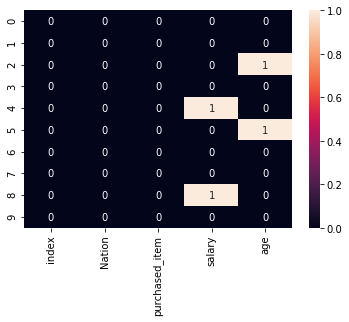

In [153]:
#Lets check whether the null values are present in the dataset or not using heatmap

sns.heatmap(df.isnull(), annot=True)
plt.show()

In [154]:
#lets check the null values without using visualization

df.isnull().sum()

index             0
Nation            0
purchased_item    0
salary            2
age               2
dtype: int64

In [155]:
#imputer works for numerical data such as Age & Salry

from sklearn.impute import SimpleImputer

#handling null data/value or imputing null
imp1=SimpleImputer(strategy="median")
df['age']=imp1.fit_transform(df['age'].values.reshape(-1, 1))

imp2=SimpleImputer(strategy="mean")
df['salary']=imp2.fit_transform(df['salary'].values.reshape(-1, 1))

df

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.0
1,1,Russia,Yes,87878.0,24.0
2,2,Germany,No,34559.0,25.0
3,3,India,Yes,40000.0,26.0
4,4,Germany,Yes,60873.0,21.0
5,5,Russia,No,45000.0,25.0
6,6,Germany,Yes,89993.0,62.0
7,7,India,No,55555.0,24.0
8,8,Russia,Yes,60873.0,45.0
9,9,Germany,Yes,67222.0,53.0


In [156]:
#Now dropping the  "Index" column from the dataset as they do not contribute in building the model
df=df.drop(["index"], axis=1)
df

,Nation,purchased_item,salary,age
0,India,No,66777.0,23.0
1,Russia,Yes,87878.0,24.0
2,Germany,No,34559.0,25.0
3,India,Yes,40000.0,26.0
4,Germany,Yes,60873.0,21.0
5,Russia,No,45000.0,25.0
6,Germany,Yes,89993.0,62.0
7,India,No,55555.0,24.0
8,Russia,Yes,60873.0,45.0
9,Germany,Yes,67222.0,53.0


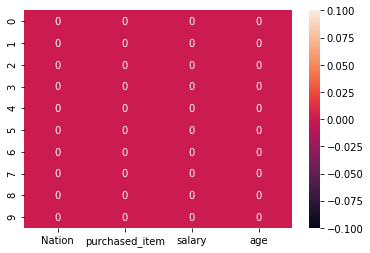

In [157]:
#Lets check whether the null values in the dataset after implementing Simple Imputer Streategy

sns.heatmap(df.isnull(), annot=True)
plt.show()

In [158]:
#lets check the null values without using visualization (after implementing Simple Imputer Streategy)

df.isnull().sum()

Nation            0
purchased_item    0
salary            0
age               0
dtype: int64

In [159]:
# Import label encoder 
# Now lets replace the categorical values (alphabetic values) to numeric values using Label Encoder
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

df['Nation']=label_encoder.fit_transform(df['Nation'])
df['Nation']

0    1
1    2
2    0
3    1
4    0
5    2
6    0
7    1
8    2
9    0
Name: Nation, dtype: int32

In [160]:
#Now lets check the Correlation factor

dfcor=df.corr()
dfcor

,Nation,salary,age
Nation,1.000000,0.013604,-0.293517
salary,0.013604,1.000000,0.489332
age,-0.293517,0.489332,1.000000


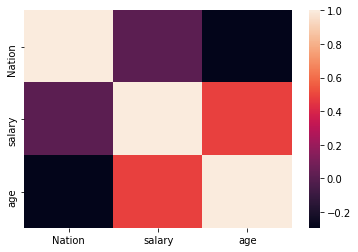

In [161]:
#Now lets check the Correlation factor with visualization

sns.heatmap(dfcor)

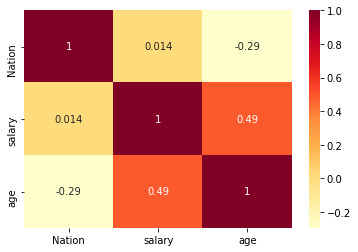

In [162]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor, cmap='YlOrRd', annot=True)

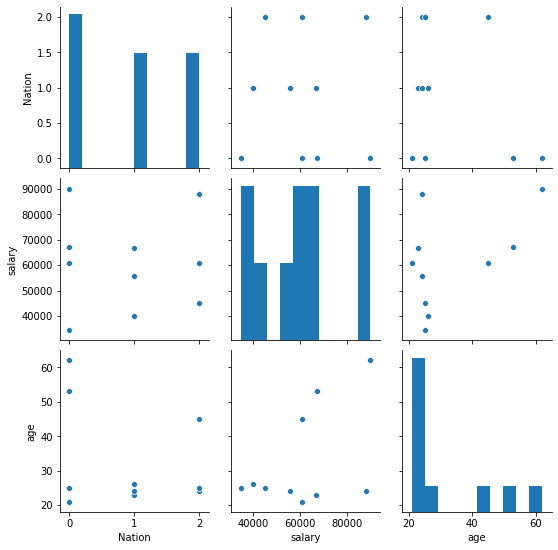

In [163]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [164]:
df.describe()

,Nation,salary,age
count,10.000000,10.000000,10.000000
mean,0.900000,60873.000000,32.800000
std,0.875595,18441.358771,14.785879
min,0.000000,34559.000000,21.000000
25%,0.000000,47638.750000,24.000000
50%,1.000000,60873.000000,25.000000
75%,1.750000,67110.750000,40.250000
max,2.000000,89993.000000,62.000000


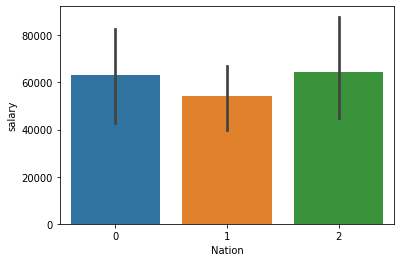

In [165]:
sns.barplot(x=df["Nation"], y=df["salary"], data=df)
plt.show()

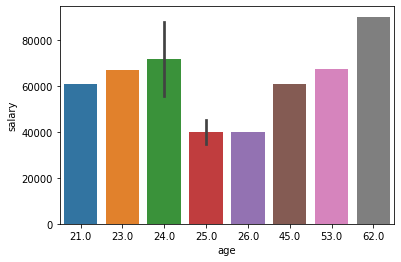

In [166]:
sns.barplot(x=df["age"], y=df["salary"], data=df)
plt.show()

In [167]:
df

,Nation,purchased_item,salary,age
0,1,No,66777.0,23.0
1,2,Yes,87878.0,24.0
2,0,No,34559.0,25.0
3,1,Yes,40000.0,26.0
4,0,Yes,60873.0,21.0
5,2,No,45000.0,25.0
6,0,Yes,89993.0,62.0
7,1,No,55555.0,24.0
8,2,Yes,60873.0,45.0
9,0,Yes,67222.0,53.0


In [168]:
# Now seperating the input column & out columns for further calculation

df1= df.iloc[:,[0,2,3]].values
df2= df['purchased_item'].values

df1=pd.DataFrame(df1)
df2=pd.DataFrame(df2)

#Assigning the x & y cordinate value for train, test, spli function
x=df1
y=df2

print(x)
print()
print(y)

     0        1     2
0  1.0  66777.0  23.0
1  2.0  87878.0  24.0
2  0.0  34559.0  25.0
3  1.0  40000.0  26.0
4  0.0  60873.0  21.0
5  2.0  45000.0  25.0
6  0.0  89993.0  62.0
7  1.0  55555.0  24.0
8  2.0  60873.0  45.0
9  0.0  67222.0  53.0

     0
0   No
1  Yes
2   No
3  Yes
4  Yes
5   No
6  Yes
7   No
8  Yes
9  Yes


In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.22, random_state=43)

In [170]:
#RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train)
predrfc=rfc.predict(x_test)
confusion_matrix(y_test, predrfc)
print(accuracy_score(y_test, predrfc))
print(classification_report(y_test, predrfc))

0.6666666666666666
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         0
         Yes       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



In [171]:
#support vector classifier

svc=SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
predsvc=svc.predict(x_test)
confusion_matrix(y_test, predsvc)
print(accuracy_score(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.3333333333333333
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         0
         Yes       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



In [174]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_train, y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.3333333333333333
[[0 0]
 [2 1]]
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         0
         Yes       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



In [177]:
#Final model is selected as RandomForestClassifier, so cross validating the model using cross_val_score

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=3, scoring = "accuracy")

print("Scores:", scores)
print()
print("Mean:", scores.mean())

Scores: [1.  0.5 0.5]

Mean: 0.6666666666666666


In [180]:
#Lets save the model using joblib
from sklearn.externals import joblib

#save the model as a pickle in a file
joblib.dump(predrfc, 'predrfc_age_salary_project3.pkl')

['predrfc_age_salary_project3.pkl']